# DATASET AND LIBRARY IMPORTING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/fetal-health-monitoring-dataset/f_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,144.0,0.002,0.010,0.002,0.000,0.0,0.0,76.0,0.6,0.0,...,126.0,180.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,2.0
1,125.0,0.005,0.002,0.006,0.009,0.0,0.0,60.0,1.3,0.0,...,68.0,164.0,6.0,1.0,110.0,120.0,120.0,34.0,0.0,1.0
2,120.0,0.013,0.006,0.003,0.000,0.0,0.0,40.0,1.3,0.0,...,68.0,157.0,5.0,1.0,133.0,134.0,136.0,9.0,1.0,1.0
3,142.0,0.000,0.006,0.000,0.000,0.0,0.0,61.0,0.7,52.0,...,71.0,150.0,12.0,0.0,143.0,142.0,144.0,3.0,1.0,2.0
4,145.0,0.000,0.000,0.002,0.000,0.0,0.0,49.0,0.6,3.0,...,140.0,167.0,0.0,0.0,159.0,156.0,158.0,3.0,1.0,2.0


# BASIC DATA INFORMATION

In [2]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [3]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [4]:
df.fetal_health.value_counts()

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

In [5]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

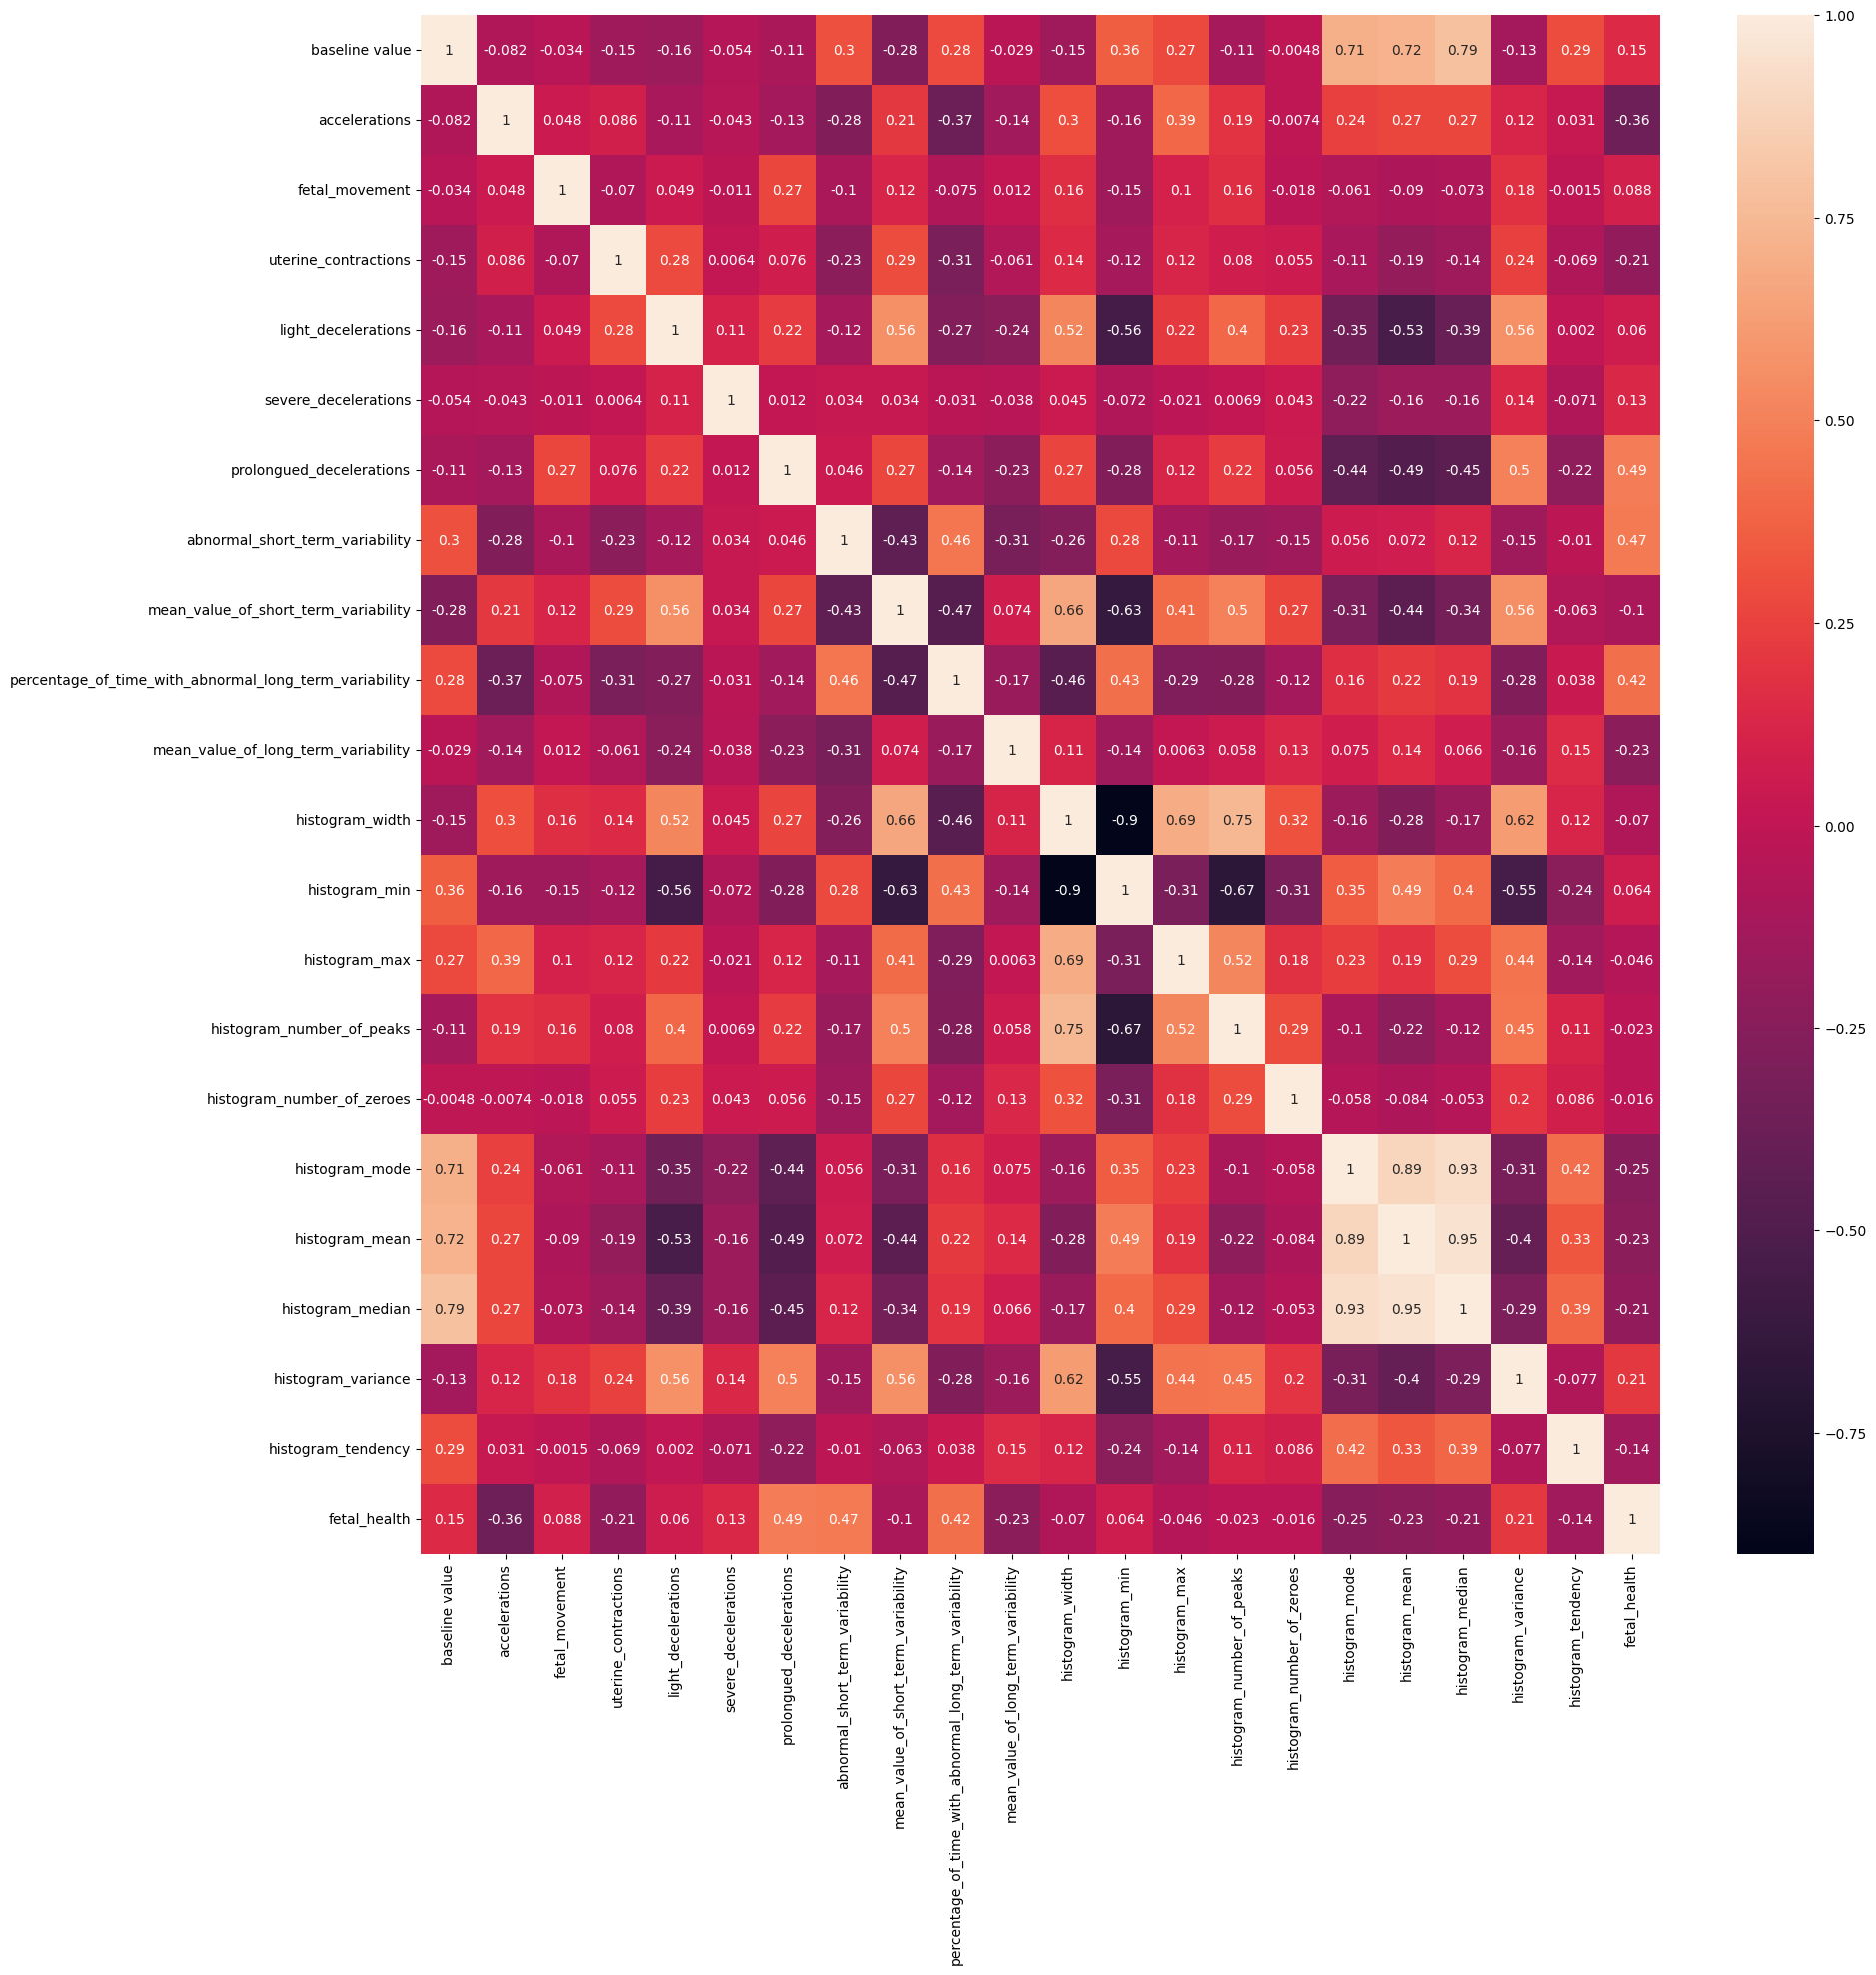

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [7]:
df.shape

(2113, 22)

# PRIMARY FEATURE SELECTION AND DATA MANIPULATION

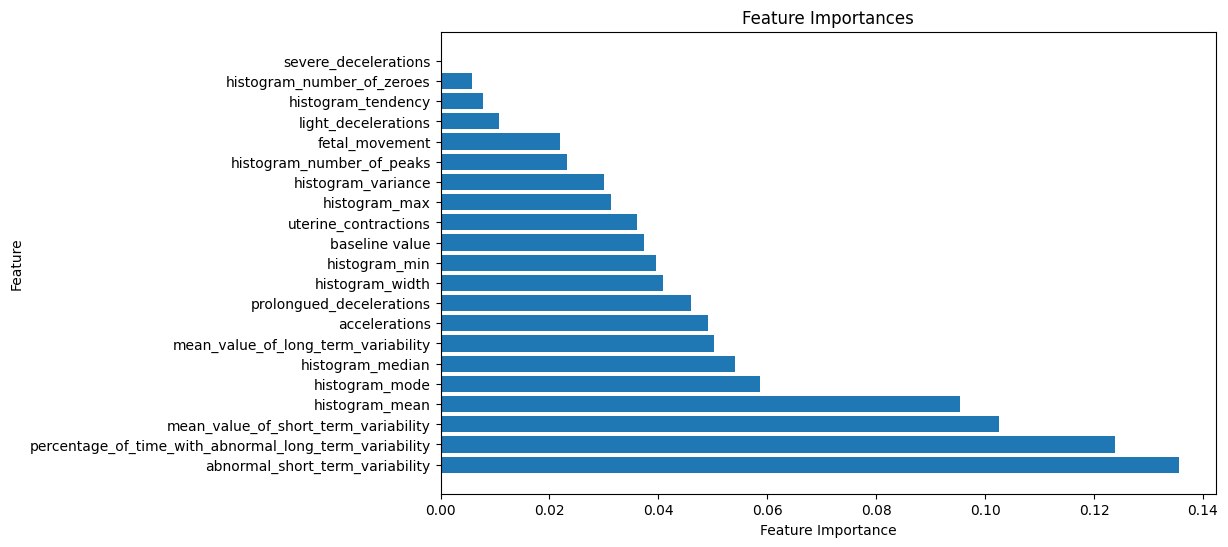

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=df.drop(['fetal_health'],axis=1)
y=df.fetal_health


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)


feature_importances = rf.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<h4> From the Correlation Matrix above, we can see that histogram_mean, histogram_mode, and histogram_median are highly correlated to each other. This can lead to redundancy and unnecessary noise in our model. histogram_tendency also has a decent positive correlation with the above-mentioned features, and in the Feature Importance graph above, it has one of the lowest importances. histogram_number_of_zeroes, however, has almost no significant correlation with other values. 
    
From the Feature Importance graph above and the correlation matrix, we can decide to drop the columns severe_decelerations, histogram_number_of_zeroes, and histogram_tendency in order to reduce redundancy and multicolinearity. </h4>

In [9]:
df_new = df.copy()

for each_feat in features[-3:]:

    df_new.drop(each_feat, axis=1, inplace = True)

In [10]:
df_new.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance', 'fetal_health'],
      dtype='object')

In [11]:
df_new['fetal_health'] = df_new['fetal_health'].astype('object')

# BASIC DATA VISUALIZATION

In [12]:
numerical_cols = df_new.select_dtypes(exclude = 'O').columns.tolist()

In [13]:
numerical_cols

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance']

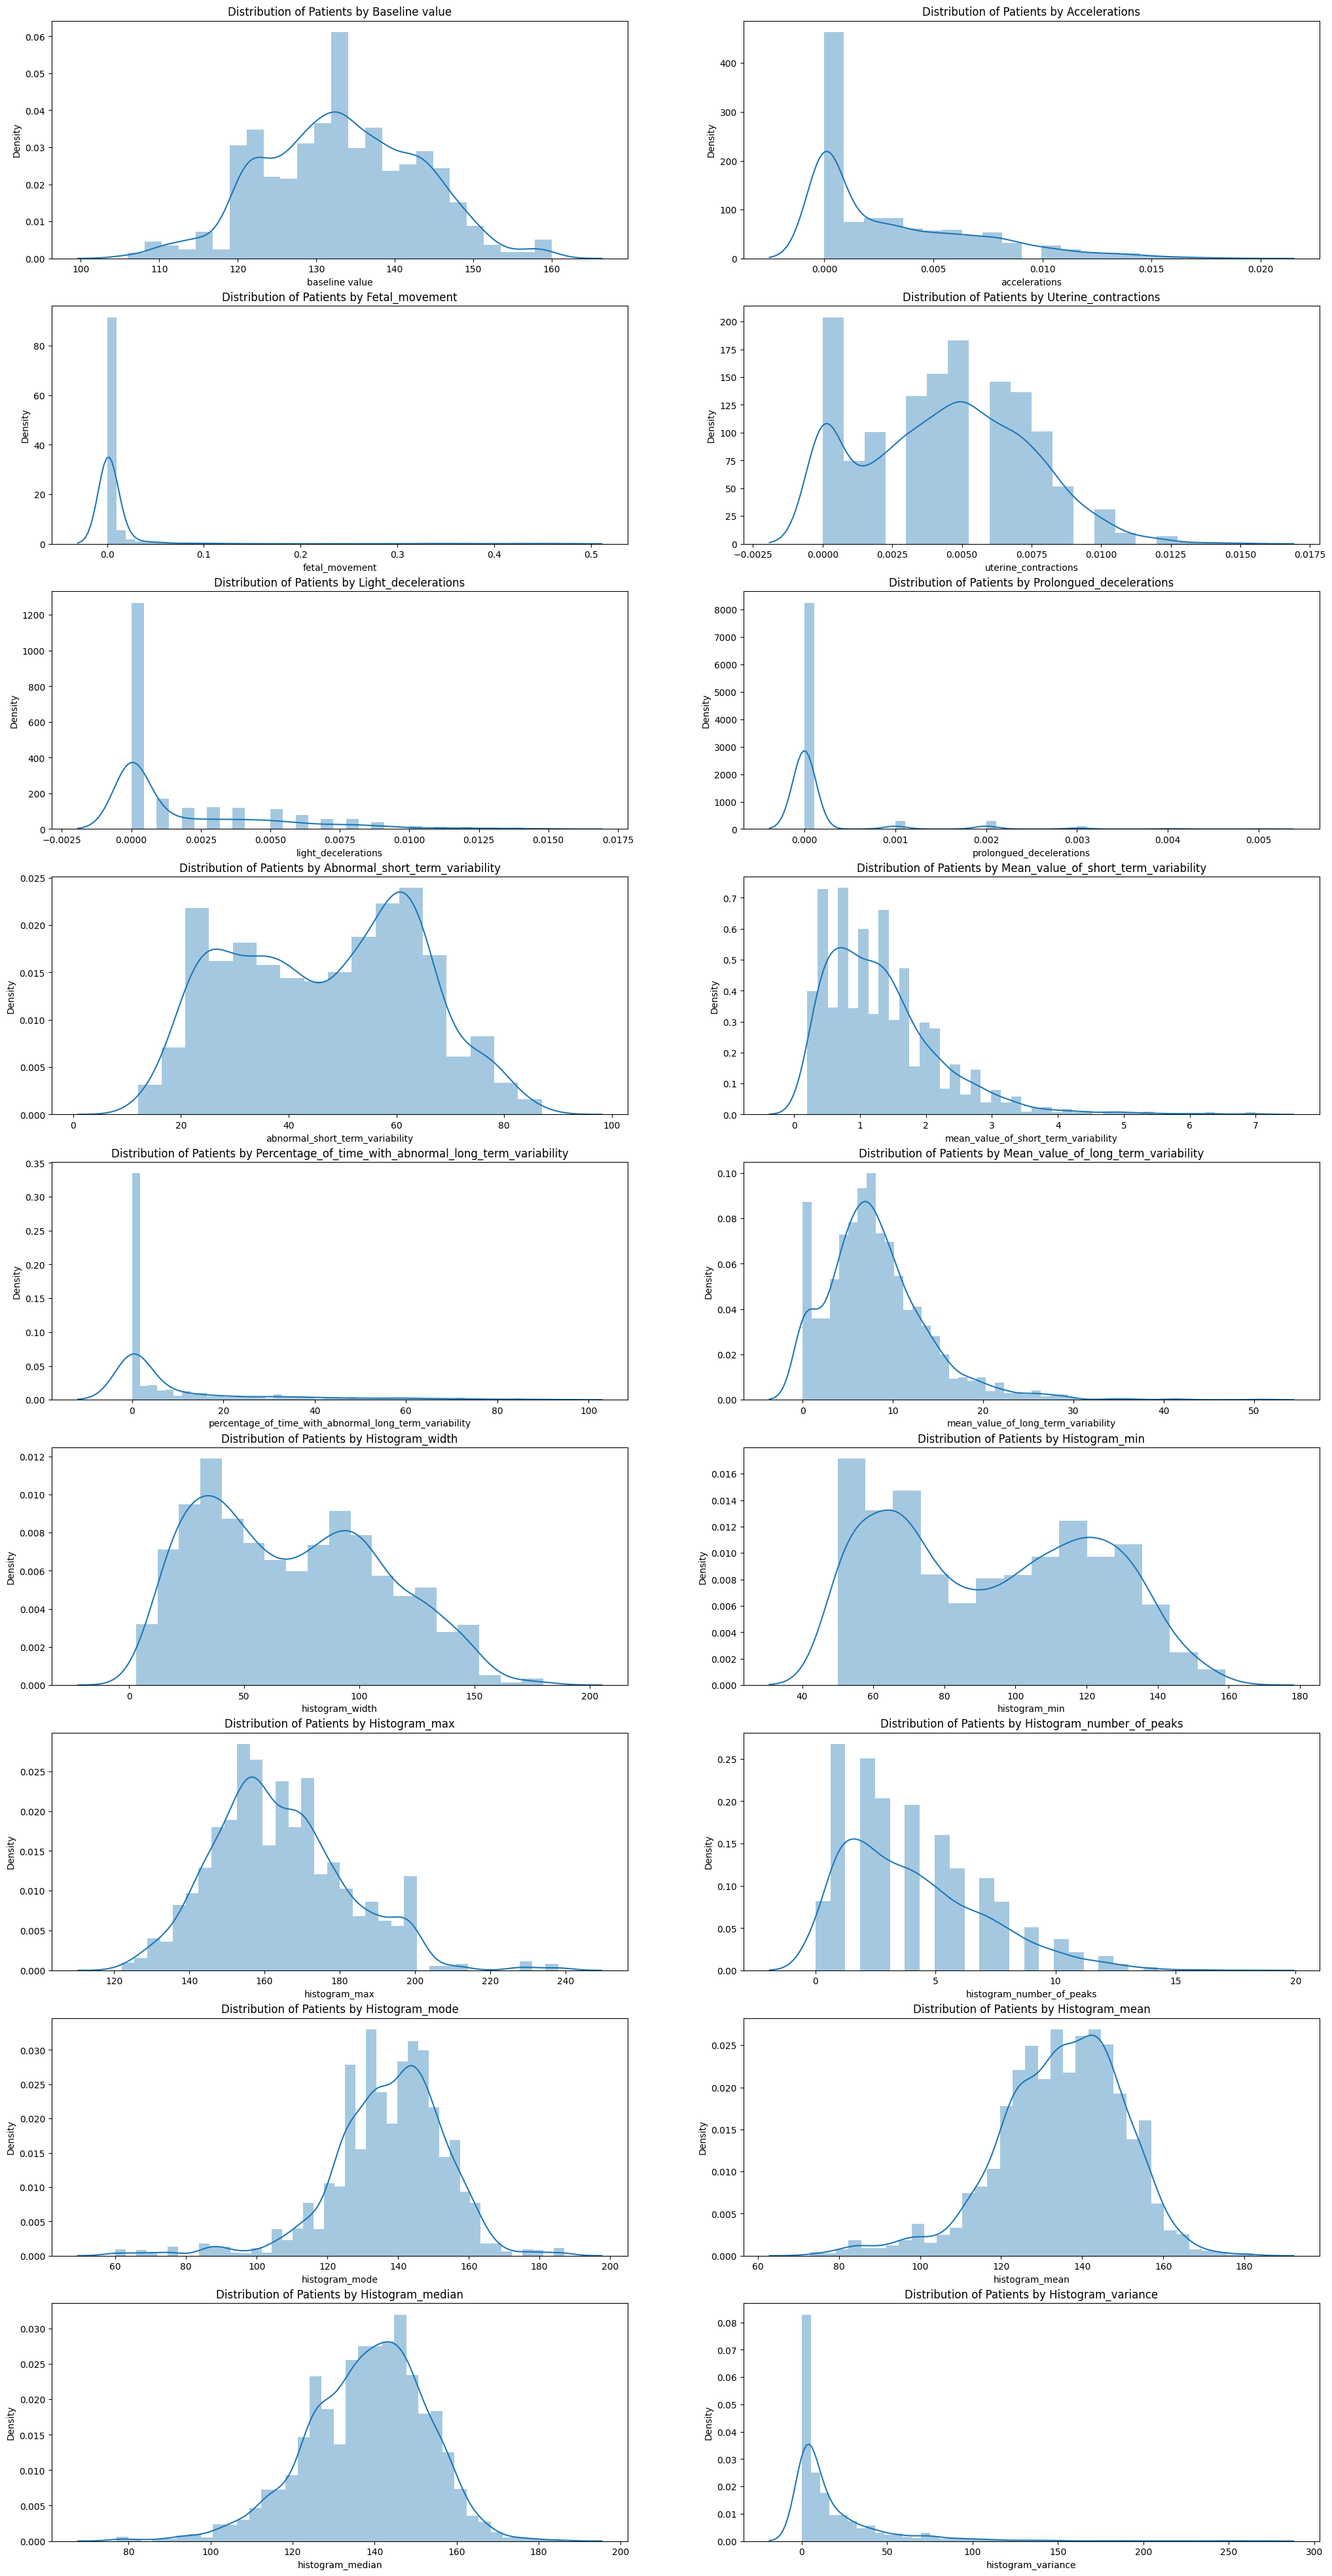

In [14]:
fig, axes = plt.subplots(nrows=round(len(numerical_cols)/2), ncols=2, figsize = (25,50))

# Iterate through each column and plot a countplot
for i, column in enumerate(numerical_cols):
   
    sns.distplot(df_new[column], ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

In [15]:
fetal_health_df = df_new.groupby('fetal_health').mean()

In [16]:
fetal_health_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance
fetal_health,,,,,,,,,,,,,,,,,,
1.0,131.998177,0.004002,0.008002,0.004801,0.001952,0.000052,42.501823,1.431713,5.059538,8.679891,73.492102,91.073512,164.565614,4.170109,138.286756,135.116039,138.482382,17.556501
2.0,141.650685,0.000277,0.008284,0.002404,0.000541,0.000096,61.791096,0.642123,28.832192,8.028425,49.250000,113.304795,162.554795,3.328767,146.551370,144.746575,147.061644,7.277397
3.0,131.668571,0.000394,0.025823,0.003806,0.003691,0.001280,64.554286,1.581714,22.571429,3.569714,78.240000,84.057143,162.297143,4.451429,114.445714,112.811429,119.422857,51.017143


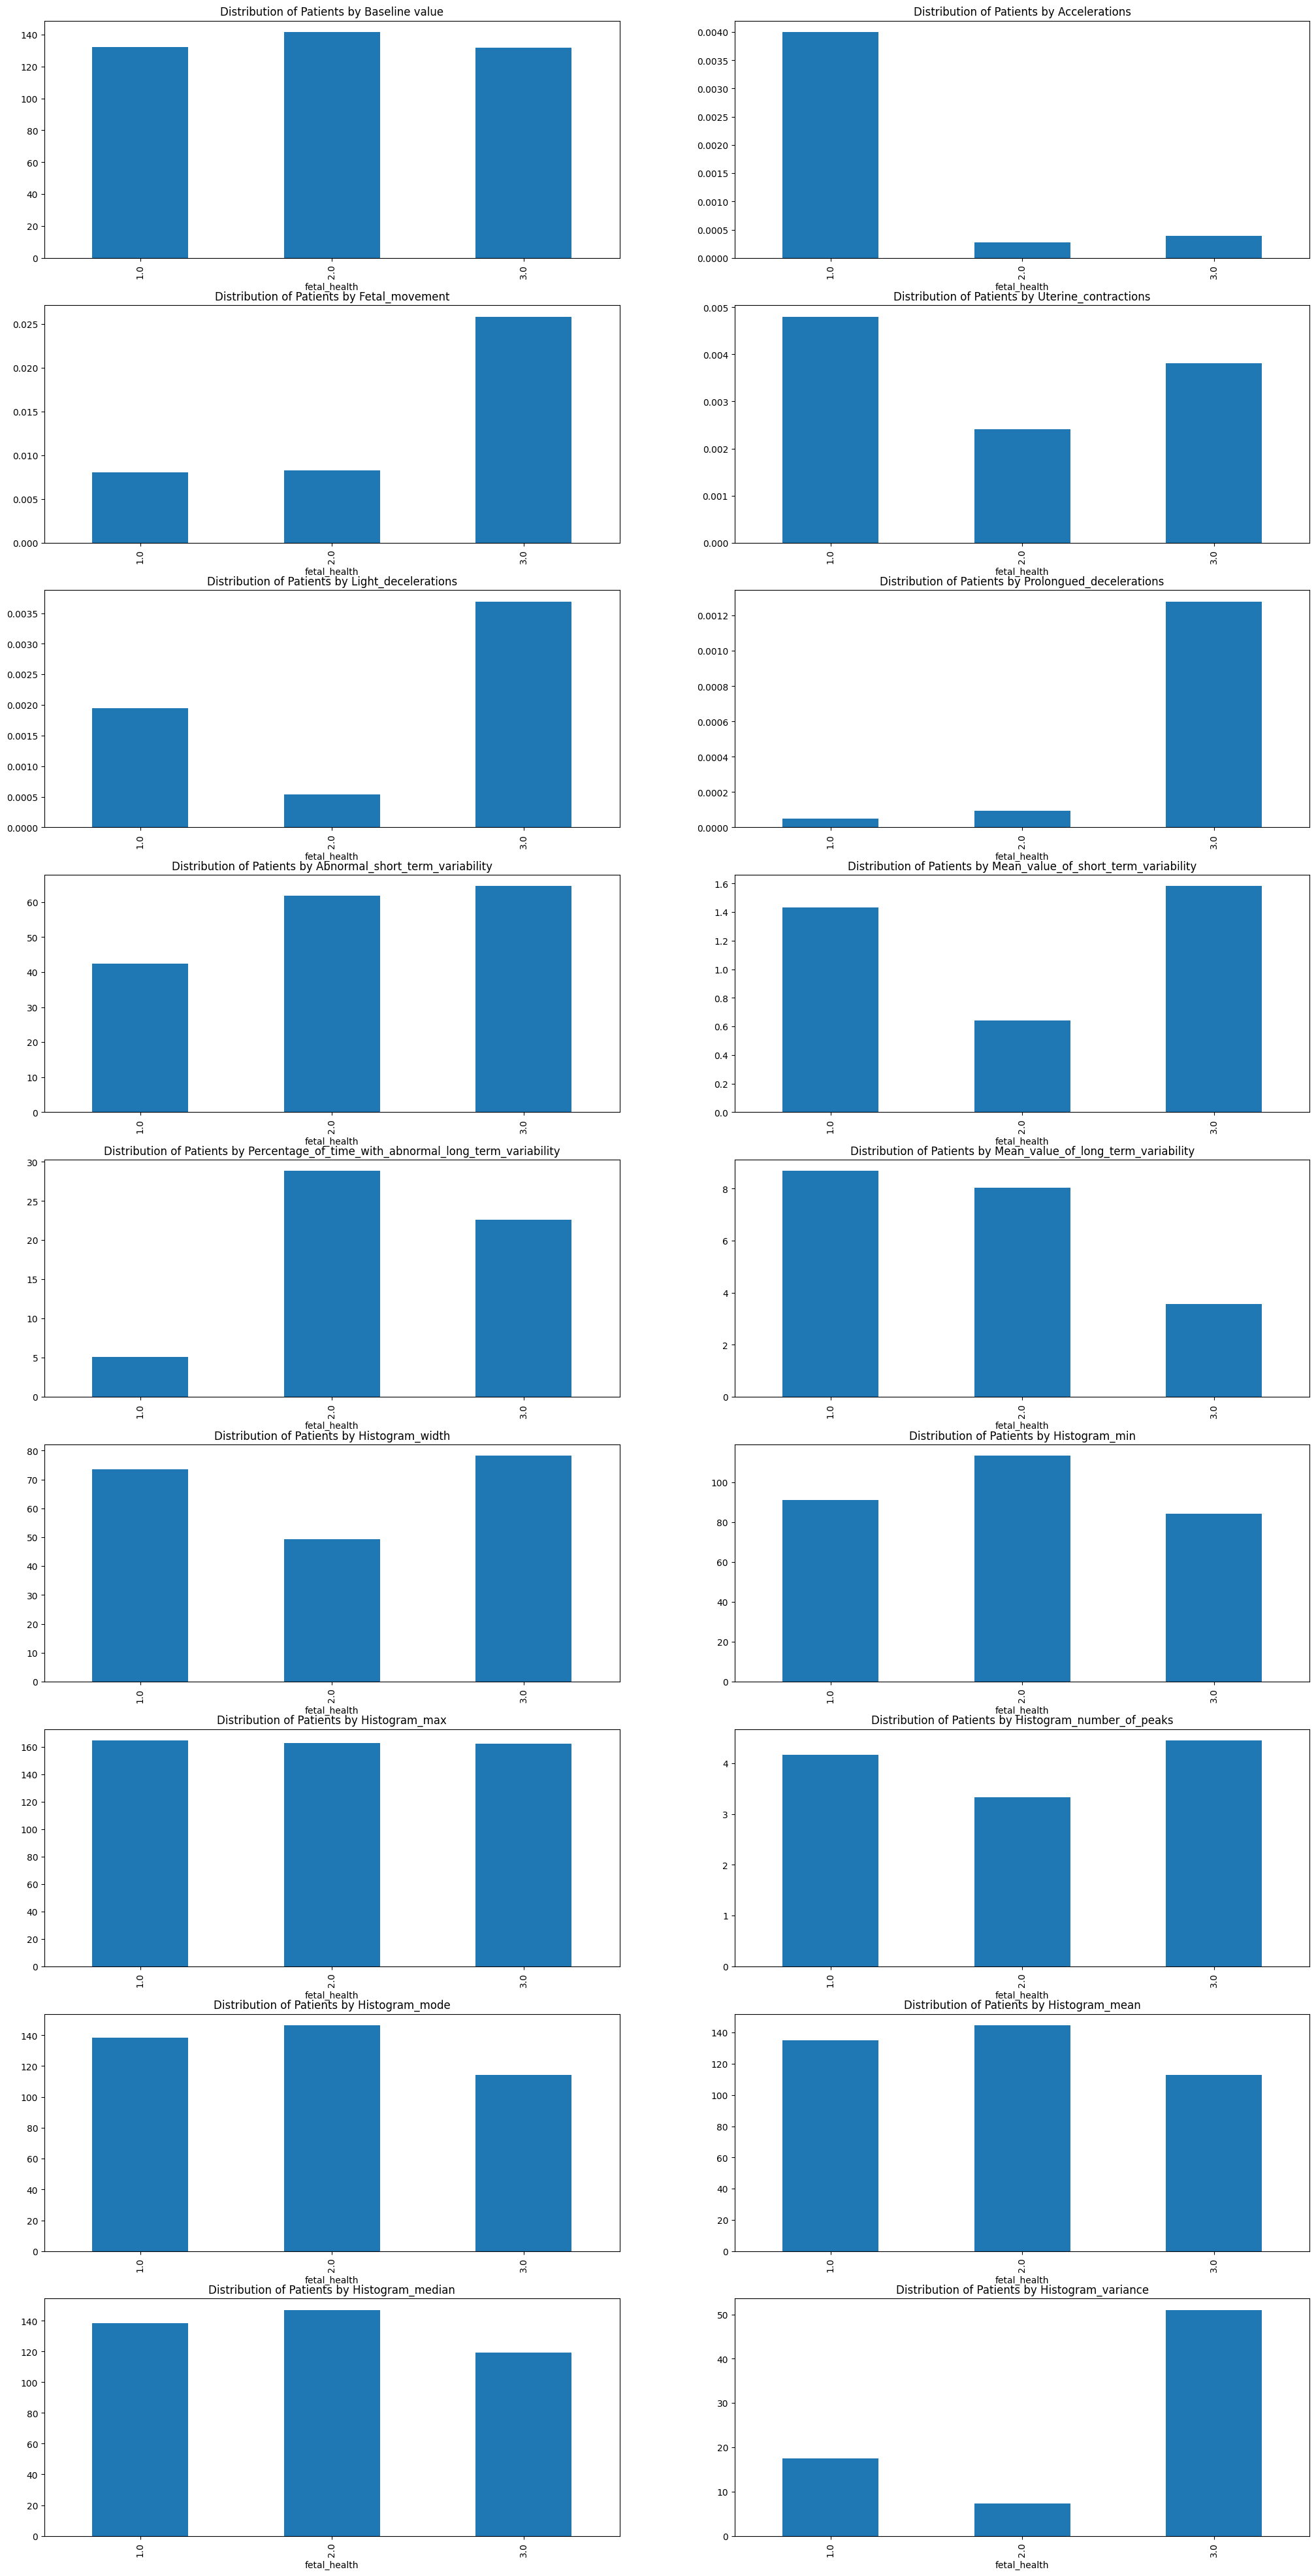

In [17]:
fig, axes = plt.subplots(nrows=round(len(fetal_health_df.columns)/2), ncols=2, figsize = (25,50))

# Iterate through each column and plot a countplot
for i, column in enumerate(fetal_health_df.columns):
    
    fetal_health_df[column].plot(kind = 'bar',ax=axes[i//2,i%2])
    
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

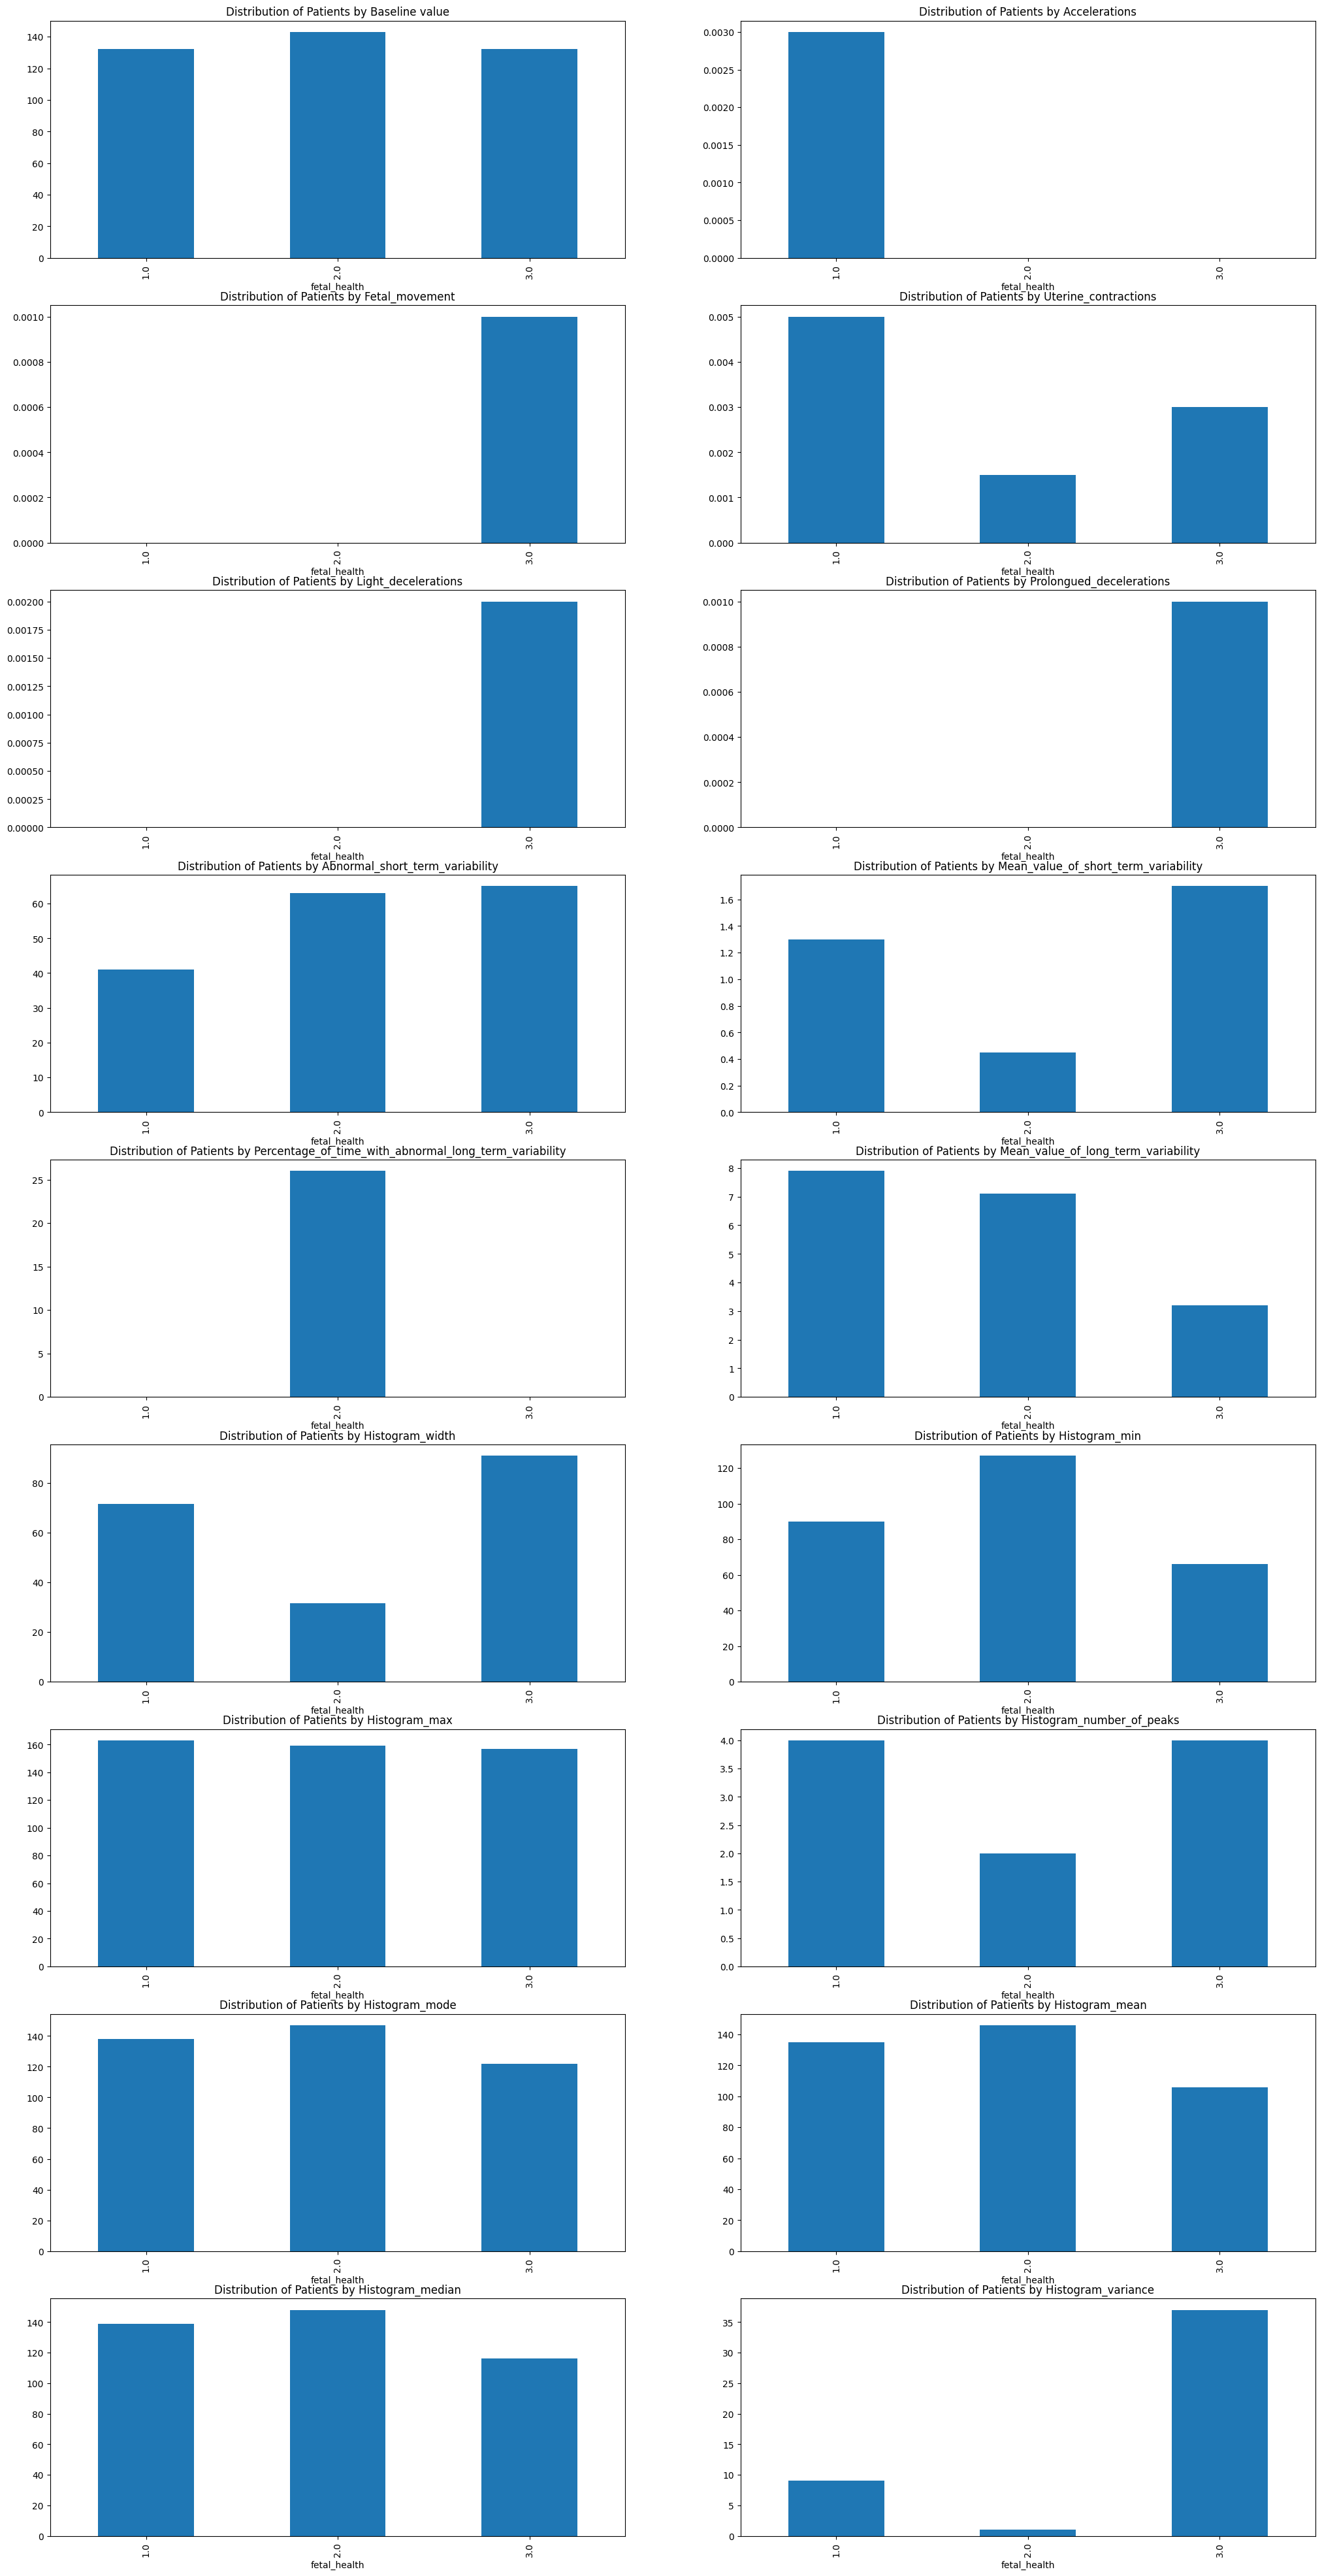

In [18]:
fetal_health_df_median = df_new.groupby('fetal_health').median()

fig, axes = plt.subplots(nrows=round(len(fetal_health_df_median.columns)/2), ncols=2, figsize = (25,50))

# Iterate through each column and plot a countplot
for i, column in enumerate(fetal_health_df_median.columns):
    
    fetal_health_df_median[column].plot(kind = 'bar',ax=axes[i//2,i%2])
    
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

* For all Classes of Fetal Heath, the baseline value is always over 120. The mean baseline value is a bit higher for Class 2 (suspect) than others. 

* The mean and median Accelerations for Normal Fetals are much greater than the other classes, which attests to the fact that Accelerations is used as a reassurance for good fetal health. 

* Fetal Movement is much greater for Pathological Fetals than Normal or Suspect fetals, and indicates the need for checkups. 

* For normal Fetals, Uterine Contractions will be better in average compared to abnormal ones. 

* Temporary decreases in FHR or Light Decelerations are more noticeable for Fetals that are pathological and less noticeable for normal fetals. 

* Abnormal short term variability indicates fetal distress and quite clearly, it's much greater on average compared to normal or suspect fetals. 

* On the other hand, Long Term variability indicates fetal well-being, and thus, its values for Normal Fetals are greater than Suspect or Pathological Fetals. 

* The variance in FHR is very high for fetals that are pathological, as seen form the Histogram_Variance graph. For suspect fetals, the Variance is even smaller, compared to Normal fetals. 

# MODEL TRAINING

In [19]:
X = df_new.drop(['fetal_health'], axis =1 )
y = df_new['fetal_health']


numerical_cols = X.select_dtypes(exclude = 'O').columns.tolist()


numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, numerical_cols),        
    ]
)

X_scaled = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

#X_train.shape, X_test.shape

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)


In [20]:
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    #roc_auc = roc_auc_score(true, predicted,average='macro')
    confusion = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1,  confusion

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifer": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 

}
model_list = []
r2_list =[]
best_f1_score = 0
best_model = None 

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train_encoded) # Train model
    
    
    
    y_test_encoded = label_encoder.transform(y_test)
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_acc , model_train_precision, _, model_train_f1, _ = evaluate_classification_model(y_train_encoded, y_train_pred)

    model_test_acc , model_test_precision, _, model_test_f1, _ = evaluate_classification_model(y_test_encoded, y_test_pred)

    current_model = list(models.keys())[i]
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    #print("- ROC AUC Score: {:.4f}".format(model_train_roc_auc))

    print('----------------------------------')
    
    print('Model performance for Testing set')
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    #print("- ROC AUC Score: {:.4f}".format(model_test_roc_auc))
    #r2_list.append(model_test_f1)
    
    avg_f1_score = (model_train_f1 + model_test_f1)/2
    
    if avg_f1_score > best_f1_score:
        
        best_f1_score = avg_f1_score
        best_model = model
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9059
- Precision: 0.9056
- F1 Score: 0.9057
----------------------------------
Model performance for Testing set
- Accuracy: 0.8747
- Precision: 0.8752
- F1 Score: 0.8747


K-Neighbors Classifer
Model performance for Training set
- Accuracy: 0.9343
- Precision: 0.9322
- F1 Score: 0.9325
----------------------------------
Model performance for Testing set
- Accuracy: 0.9196
- Precision: 0.9184
- F1 Score: 0.9181


Decision Tree
Model performance for Training set
- Accuracy: 0.9994
- Precision: 0.9994
- F1 Score: 0.9994
----------------------------------
Model performance for Testing set
- Accuracy: 0.9433
- Precision: 0.9443
- F1 Score: 0.9436


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9994
- Precision: 0.9994
- F1 Score: 0.9994
----------------------------------
Model performance for Testing set
- Accuracy: 0.9645
- Precision: 0.9647
- F1 Score: 0.9645


XGBClassifier
Model performance

In [22]:
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [23]:
best_model.fit(X_train, y_train_encoded) # Train model

y_test_encoded = label_encoder.transform(y_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print (classification_report(y_test_pred, y_test_encoded))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.90      0.90      0.90        61
           2       0.95      0.98      0.96        42

    accuracy                           0.97       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.97      0.97      0.97       423



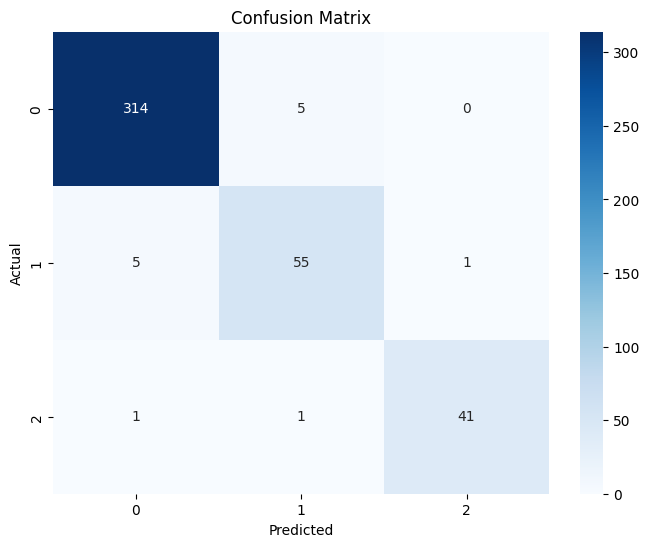

In [24]:
cm = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()